In [1]:
#Cài đặt thư viện
!pip install tslearn
!pip install webdriver-manager
!pip install selenium
# Để selenium tương tác được với trình duyệt web
# ta cần cài đặt trình duyệt driver để ở cùng thư mục với file code
# và trình duyệt driver phải cùng phiên bản với trình duyệt đang sử dụng
# Link download ChromeDriver "https://chromedriver.chromium.org/downloads"

# Câu 1

In [2]:
#import thư viện
from time import sleep
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

In [3]:
#Danh sách các mã chứng khoán
symbols = ["AAA", "AAM", "ABS", "ACB", "ACL", "AST", "CLC", "CLL", "CMX", "CSV", 
           "DBC", "DC4", "DXG", "GAS", "HCM", "HVH", "OPC", "POM", "PPC", "PVT", 
           "PXI", "PXS", "REE", "RIC", "ROS", "S4A", "SCS", "SFC", "SFI", "SGN", 
           "SGR", "SII", "YEG", "YBM", "VTO", "VSI", "VSH", "VSC", "VRE", "VRC", 
           "VPS", "VPI", "VPH", "VMD", "VIP", "NHH", "LSS", "L10", "C47", "NVL", 
           "CRE", "CTI", "EVE", "HII", "MSN", "NAV", "COM", "LPB", "VTB", "PGD"]
#Tạo list để lưu giá đóng cửa của mỗi mã chứng khoán
array_close_price = []

driver = webdriver.Chrome(ChromeDriverManager().install())
#Mở trang web
driver.get("https://www.mbs.com.vn/vi/OverviewMarket/StatisticsPrice?nostockcode=true")

#Vòng lặp chạy hết 60 mã chứng khoán
for symbol in symbols:
    
    #Nhập ngày bắt đầu - Ngày bắt đầu từ 01/01/2021
    start_date = driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div[3]/div[1]/div[1]/div[2]/div[2]/input")
    start_date.clear()
    start_date.send_keys("01-01-2021")
    
    #Nhập ngày kết thúc - Ngày kết thúc đến 12/12/2021
    end_date = driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div[3]/div[1]/div[1]/div[2]/div[4]/input")
    end_date.clear()
    end_date.send_keys("12-12-2021")
    
    #Nhập mã cổ phiếu
    search_input = driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div[3]/div[1]/div[1]/div[1]/div[4]/div/input[2]")
    search_input.clear() #Xóa ô input
    search_input.send_keys(symbol) #Nhập mã vào ô input
    sleep(1)
    search_input.send_keys(Keys.ENTER) #Enter để tìm dữ liệu
    
    #Tạo list để lưu các giá đóng cửa của mã chứng khoán
    close_price = []
    #Tạo list để lưu ngày của mã chứng khoán.
    date = []
    sleep(5)
    
    #Sử dụng BeautifulSoup để lấy toàn bộ html của trang web.
    page_source = BeautifulSoup(driver.page_source)
    #Tìm đến bảng chứa dữ liệu chứng khoán bằng find() với class của bảng là table-view table-tkg tb-text.
    data = page_source.find(class_ = "table-view table-tkg tb-text")
    #Từ bảng dữ liệu chứng khoán đã tìm được ở trên, tìm tbody của bảng bằng find().
    data1 = data.find('tbody')
    #Từ tbody đã tìm được, tìm tr bnawgf find_all(), find_all() sẽ tìm hết những tr trong tbody.
    data2 = data1.find_all('tr')
    #Từ tr đã tìm được, chạy vòng lặp để tìm các span chứa các giá trị bằng find_all().
    for i in data2:
        data3 = i.find_all('span')
        count = 1
        count1 = 1
        #Chạy vòng lặp các span đã tìm được từ từng tr
        for x in data3:
            #Vì giá đóng cửa ở cột thứ 3 nên đặt điều kiện nếu count = 3 thì sẽ đem giá trị vào list giá đóng cửa.
            if (count == 3):
                #Xử lý đưa về dạng float
                x_float = float(x.string)
                close_price.append(x_float)
            count += 1
        #Chạy vòng lặp các span đã tìm được từ từng tr
        for y in data3:
            #Ngày ở cột đầu tiên nên đặt điều kiện nếu count1 = 1 thì sẽ giá trị vào list ngày.
            if (count1 == 1):
                date.append(y.string)
            count1 += 1
    #Mỗi lần lặp sẽ lưu list giá đóng cửa của mỗi mà vào một list lớn.
    array_close_price.append(close_price)
    sleep(1)
    #Refresh lại trang web để bắt đầu lấy dữ liệu của mã chứng khoán mới
    driver.refresh()
sleep(1)
#Sau cùng sẽ tự động đóng trang web
driver.close()

print(len(array_close_price))
# print(array_close_price)



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/96.0.4664.45/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\ASUS\.wdm\drivers\chromedriver\win32\96.0.4664.45]
<ipython-input-3-a368749e62bc>:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
<ipython-input-3-a368749e62bc>:19: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  start_date = driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div[3]/div[1]/div[1]/div[2]/div[2]/input")
<ipython-input-3-a368749e62bc>:24: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  end_date = driver.find_element_by_xpath("/html/body/div[1]/div[2]/div[2]/div[3]/div[1

60


In [4]:
#Vì lấy dữ liệu từ hiện tại đến quá khứ, nên sử dụng reverse() để đảo ngược chuỗi thành từ quá khứ đến hiện tại
for i in array_close_price:
    i.reverse()
#Đảo ngược ngày từ 01/01/2021 đến 12/12/2021
date.reverse()

# Câu 2

In [5]:
#Import thư viện
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import dates as mpl_dates

from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

In [6]:
#Scale time series
#Tạo một list để lưu các giá đóng cửa của mỗi mã sau khi scale
array_data_normalized = []

#Chạy vòng lặp 60 lần. Vì có 60 mã 
for i in range(len(array_close_price)):
    #Khởi tạo list để lưu các giá đóng cửa của từng mã
    data_normalized = []
    #scale bằng hàm TimeSeriesScalerMeanVariance với fit_trasform
    #Với mu là giá trị trung bình của time series đầu ra
    #std là độ lệch chuẩn của time series đầu ra
    normalized = TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform([array_close_price[i]])
    #Vì khi scale xong kết quả đầu ra sẽ ở dạng khác. Nên sẽ đưa kết quả đầu ra về dạng list
    for i in range(len(normalized[0])):
        data_normalized.append(normalized[0][i][0])
    array_data_normalized.append(data_normalized)
print(len(array_data_normalized))

60


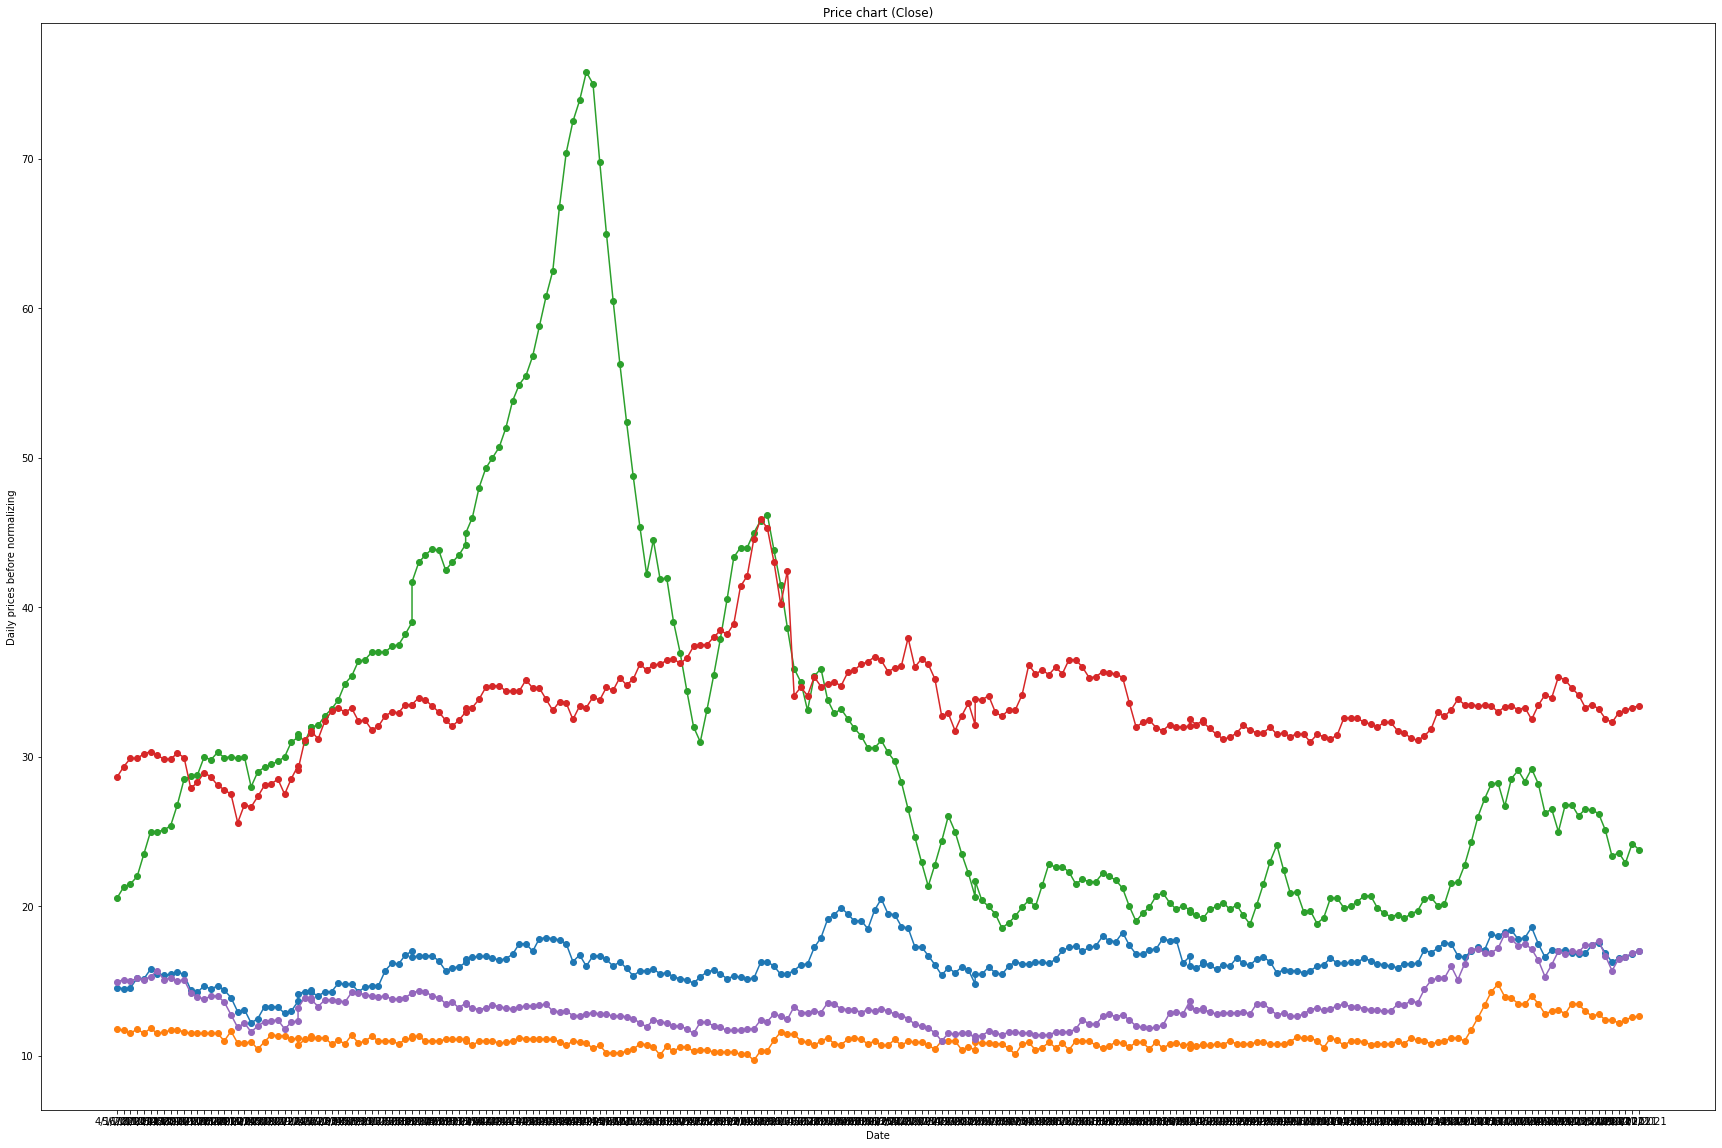

In [7]:
#Vẽ 5 mã chứng khoán đầu tiên. Dữ liệu chưa được scale
plt.figure(figsize=(30,20))
plt.plot_date(date, array_close_price[0], linestyle = 'solid')
plt.plot_date(date, array_close_price[1], linestyle = 'solid')
plt.plot_date(date, array_close_price[2], linestyle = 'solid')
plt.plot_date(date, array_close_price[3], linestyle = 'solid')
plt.plot_date(date, array_close_price[4], linestyle = 'solid')
plt.xlabel('Date')
plt.ylabel('Daily prices before normalizing')
plt.title('Price chart (Close)')
plt.show()

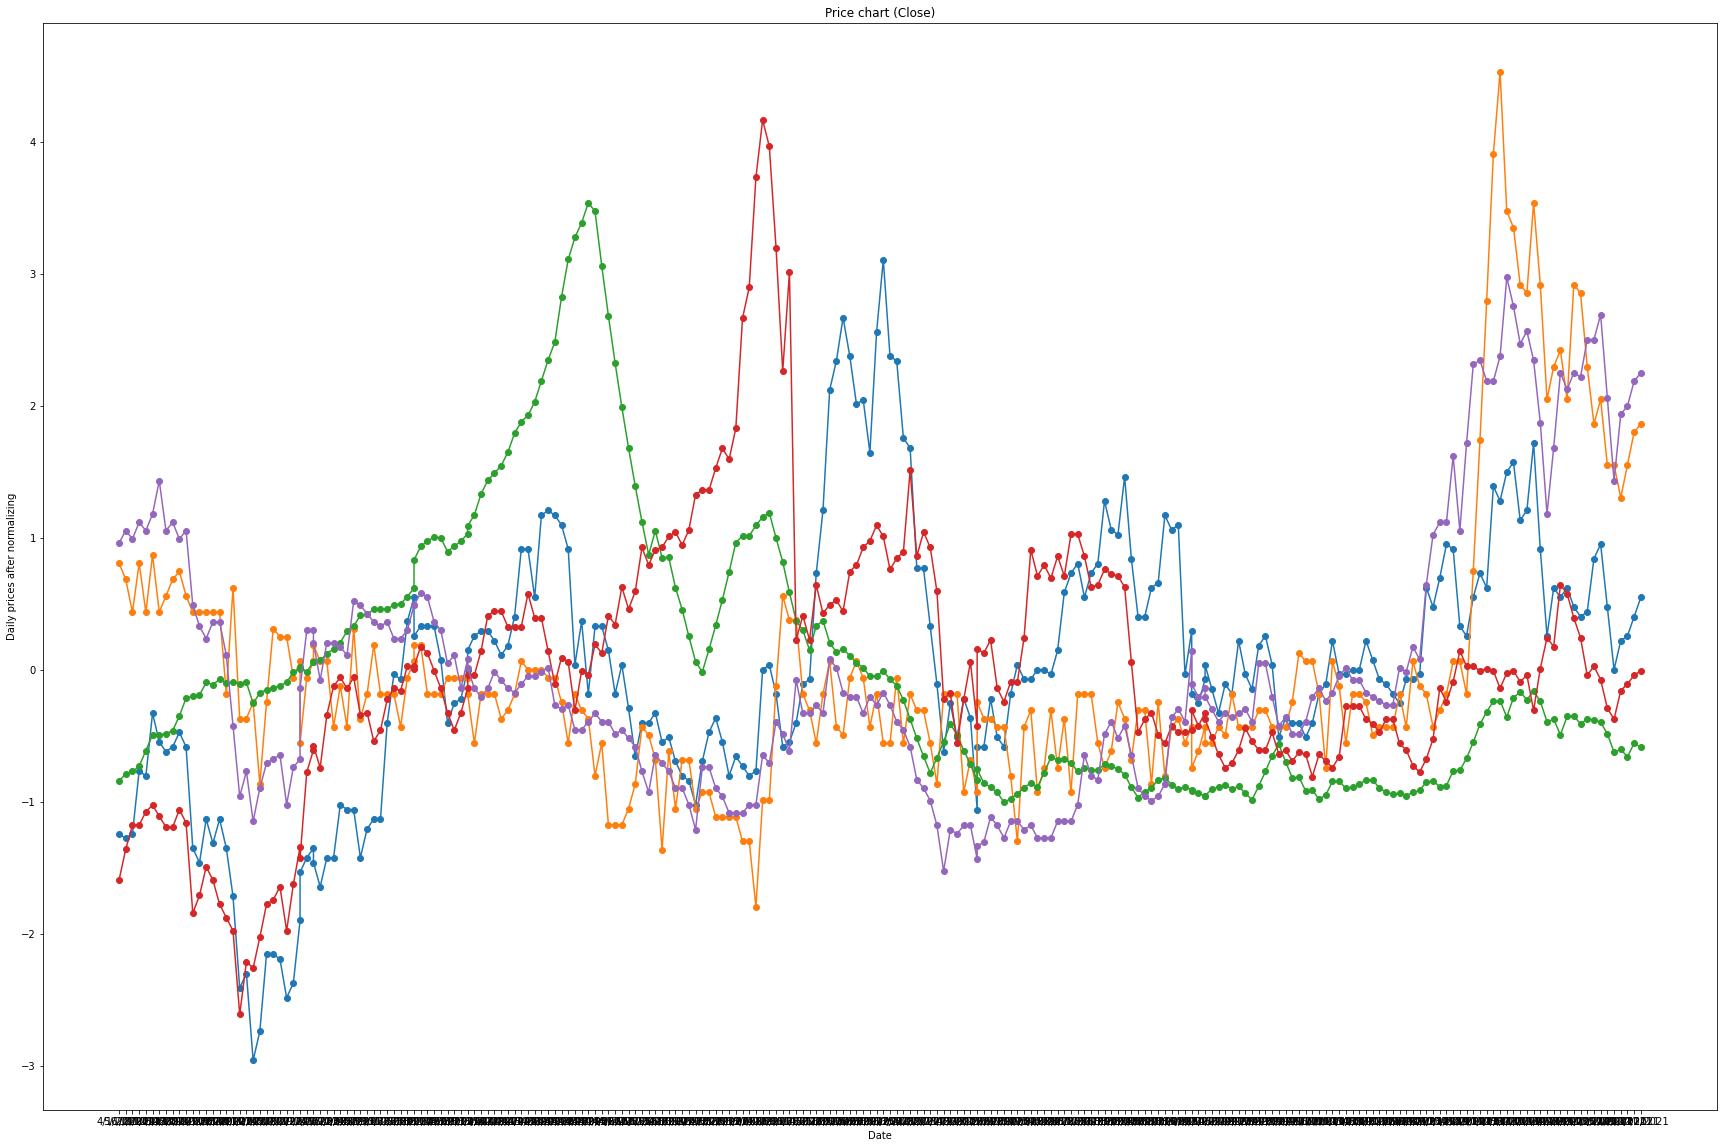

In [8]:
#Vẽ 5 mã chứng khoán đầu tiên với dữ liệu đã được scale
plt.figure(figsize=(30,20))
plt.plot_date(date, array_data_normalized[0], linestyle = 'solid')
plt.plot_date(date, array_data_normalized[1], linestyle = 'solid')
plt.plot_date(date, array_data_normalized[2], linestyle = 'solid')
plt.plot_date(date, array_data_normalized[3], linestyle = 'solid')
plt.plot_date(date, array_data_normalized[4], linestyle = 'solid')
plt.xlabel('Date')
plt.ylabel('Daily prices after normalizing')
plt.title('Price chart (Close)')
plt.show()

# Câu 3

Scaler time series

In [9]:
X_train = TimeSeriesScalerMeanVariance(mu=0.,std=1.).fit_transform(array_close_price)

# Sử dụng Elbow method

Elbow method for Euclidean k-means

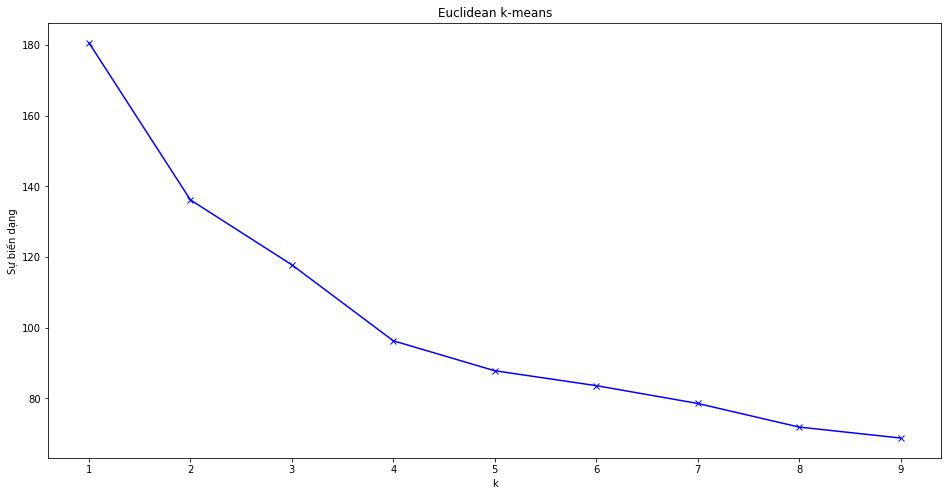

In [10]:
distortions = []
K = range(1,10)
#Tạo vòng lặp từ 1 đến 9 để thu thập các biến dạng
for k in K:
    #Sử dụng hàm K-Means cho đầu vào là time series với
    # n_clusters là số lượng cụm cần tạo thành
    # random_state là xác định việc tạo số ngẫu nhiên để khởi tạo các trung tâm
    km = TimeSeriesKMeans(n_clusters=k, random_state= 0)
    # fit_predict để tính toán các trung tâm cụm và dự đoán chỉ số cụm cho từng mẫu.
    y_pred = km.fit_predict(X_train)
    #Thêm vào list distortions bằng cách lấy thu thập quán tính của K-Mean
    #Quán tính = tổng bình phương khoảng cách của các mẫu đến trung tâm cụm gần nhất của chúng, 
    #được tính theo trọng lượng mẫu nếu được cung cấp.
    distortions.append(km.inertia_)
#Vẽ biểu đồ để chọn best-k
plt.figure (figsize = (16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Sự biến dạng')
plt.title('Euclidean k-means')
plt.show()

Elbow method for DBA-k-means

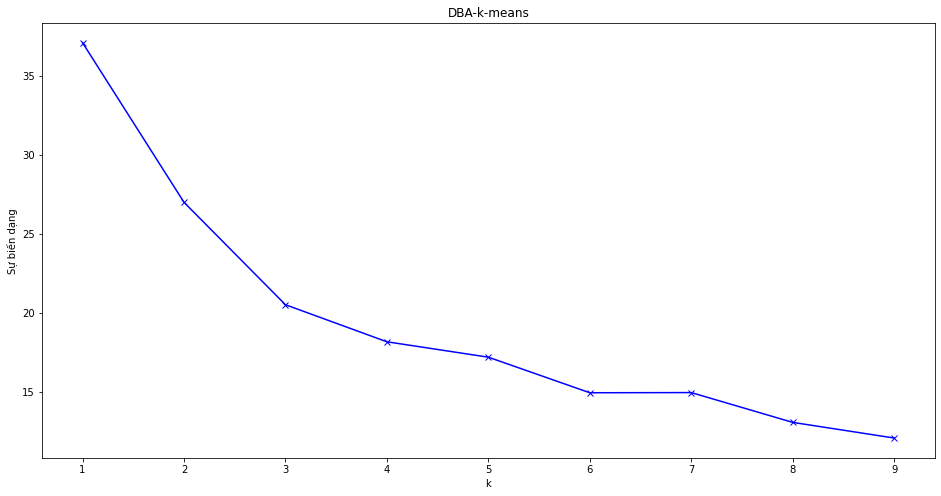

In [11]:
distortions = []
K = range(1,10)
# Tạo vòng lặp từ 1 đến 9 để thu thập các biến dạng
for k in K:
    # Sử dụng hàm K-Means cho đầu vào là time series với
    # n_init là số thời gian thuật toán k-mean sẽ được chạy
    # metric được sử dụng cho cả phân công cụm và tính toán trung tâm. Có 3 tham số: “euclidean”, “dtw”, “softdtw”
    # dtw là độ cong vênh thời gian động để so sánh hàng loạt. DTW là một kỹ thuật để đo độ tương đồng 
    # giữa hai chuỗi thời gian không sắp xếp chính xác về thời gian, tốc độ hoặc độ dài.
    # max_iter_barycenter là số lần lặp lại cho quá trình tính toán barycenter. Chỉ được sử dụng nếu metric = ”dtw” 
    # hoặc metric = ”softdtw” .
    dba_km = TimeSeriesKMeans(n_clusters=k,
                            n_init=2,
                            metric="dtw",
                            max_iter_barycenter=10,
                            random_state=0)
    y_pred = dba_km.fit_predict(X_train)
    distortions.append(dba_km.inertia_)
#Vẽ biểu đồ để chọn best-k
plt.figure (figsize = (16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Sự biến dạng')
plt.title('DBA-k-means')
plt.show()

Elbow Method for Soft-DTW k-means

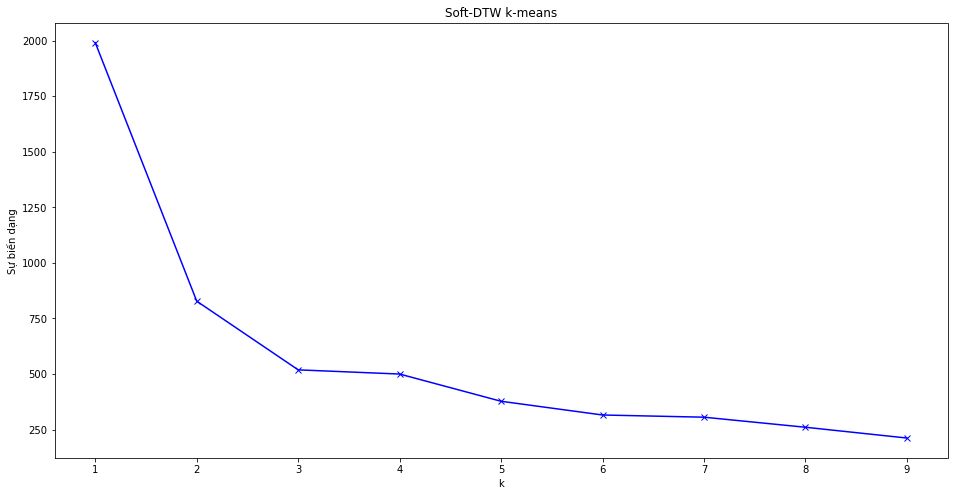

In [12]:
distortions = []
K = range(1,10)
for k in K:
    #metric_params là giá trị tham số cho chỉ số đã chọn
    sdtw_km = TimeSeriesKMeans(n_clusters=k,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           random_state=0)
    y_pred = sdtw_km.fit_predict(X_train)
    distortions.append(sdtw_km.inertia_)
#Vẽ biểu đồ để chọn best-k
plt.figure (figsize = (16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Sự biến dạng')
plt.title('Soft-DTW k-means')
plt.show()

# K-means

Euclidean k-means with best-k is 4

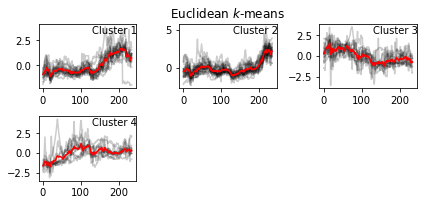

Cluster 1:  ['CLL', 'CSV', 'GAS', 'PVT', 'REE', 'S4A', 'SFC', 'VTO', 'VSH', 'VSC', 'VMD', 'VIP', 'LSS', 'EVE', 'MSN', 'PGD'] 
 Len Cluster 1:  16
Cluster 2:  ['AAM', 'ACL', 'CLC', 'CMX', 'DBC', 'DC4', 'DXG', 'HVH', 'PXI', 'PXS', 'SCS', 'SFI', 'SGR', 'YBM', 'VSI', 'VRC', 'VPI', 'VPH', 'L10', 'C47', 'CTI', 'NAV'] 
 Len Cluster 2:  22
Cluster 3:  ['ABS', 'AST', 'OPC', 'PPC', 'SGN', 'SII', 'YEG', 'VRE', 'NHH', 'HII', 'COM', 'VTB'] 
 Len Cluster 3:  12
Cluster 4:  ['AAA', 'ACB', 'HCM', 'POM', 'RIC', 'ROS', 'VPS', 'NVL', 'CRE', 'LPB'] 
 Len Cluster 4:  10


In [13]:
# Euclidean k-means
km = TimeSeriesKMeans(n_clusters=4, random_state=0)
y_pred = km.fit_predict(X_train)

plt.figure()
#Chạy vòng lặp chạy vẽ hình. Số vòng lặp tương ứng vs best-k
for yi in range(4):
    #subplot: Tạo các trục trong một phần của cửa sổ đồ họa.
    plt.subplot(3, 3, yi + 1)
    #chạy vòng lặp để vẽ từng mã cùng 1 hình
    #ravel chuyển đổi list vd: [[1,2][3,4]] => [1 2 3 4] để thực vẽ biểu đồ
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    #Vẽ đường trung tâm
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    #Tiêu đề hình
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

plt.tight_layout()
plt.show()

#Tạo list các cluster
Cluster1 = []
Cluster2 = []
Cluster3 = []
Cluster4 = []
#Thêm các mã vào các list tương ứng vs các mã đã vẽ trên mỗi hình
for i in range(len(y_pred)):
    if (y_pred[i] == 0):
        Cluster1.append(symbols[i])
    elif (y_pred[i] == 1):
        Cluster2.append(symbols[i])
    elif (y_pred[i] == 2):
        Cluster3.append(symbols[i])
    else:
        Cluster4.append(symbols[i])

print("Cluster 1: ", Cluster1, "\n" , "Len Cluster 1: ", len(Cluster1))
print("Cluster 2: ", Cluster2, "\n" , "Len Cluster 2: ", len(Cluster2))
print("Cluster 3: ", Cluster3, "\n" , "Len Cluster 3: ", len(Cluster3))
print("Cluster 4: ", Cluster4, "\n" , "Len Cluster 4: ", len(Cluster4))


DBA-k-means with best-k is 3

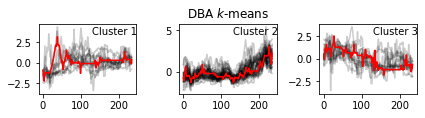

Cluster 1:  ['AAA', 'ACB', 'CLC', 'HCM', 'POM', 'RIC', 'SGR', 'VPS', 'NVL', 'CRE', 'LPB', 'VTB'] 
 Len Cluster 1:  12
Cluster 2:  ['AAM', 'ACL', 'CLL', 'CMX', 'CSV', 'DBC', 'DC4', 'DXG', 'GAS', 'HVH', 'PVT', 'PXI', 'PXS', 'REE', 'ROS', 'S4A', 'SCS', 'SFC', 'SFI', 'YBM', 'VTO', 'VSI', 'VSH', 'VRC', 'VPI', 'VPH', 'VMD', 'VIP', 'LSS', 'L10', 'C47', 'CTI', 'EVE', 'MSN', 'NAV', 'PGD'] 
 Len Cluster 2:  36
Cluster 3:  ['ABS', 'AST', 'OPC', 'PPC', 'SGN', 'SII', 'YEG', 'VSC', 'VRE', 'NHH', 'HII', 'COM'] 
 Len Cluster 3:  12


In [14]:
# DBA-k-means
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          max_iter_barycenter=10,
                          random_state=0)
y_pred = dba_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

plt.tight_layout()
plt.show()        

Cluster1 = []
Cluster2 = []
Cluster3 = []
for i in range(len(y_pred)):
    if (y_pred[i] == 0):
        Cluster1.append(symbols[i])
    elif (y_pred[i] == 1):
        Cluster2.append(symbols[i])
    else:
        Cluster3.append(symbols[i])

print("Cluster 1: ", Cluster1, "\n" , "Len Cluster 1: ", len(Cluster1))
print("Cluster 2: ", Cluster2, "\n" , "Len Cluster 2: ", len(Cluster2))
print("Cluster 3: ", Cluster3, "\n" , "Len Cluster 3: ", len(Cluster3))

Soft-DTW-k-means with best-k is 3

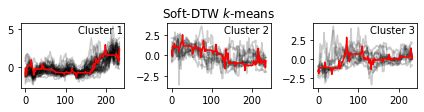

Cluster 1:  ['AAA', 'ACB', 'CLC', 'HCM', 'POM', 'RIC', 'SGR', 'VPS', 'NVL', 'CRE', 'LPB', 'VTB'] 
 Len Cluster 1:  12
Cluster 2:  ['AAM', 'ACL', 'CLL', 'CMX', 'CSV', 'DBC', 'DC4', 'DXG', 'GAS', 'HVH', 'PVT', 'PXI', 'PXS', 'REE', 'ROS', 'S4A', 'SCS', 'SFC', 'SFI', 'YBM', 'VTO', 'VSI', 'VSH', 'VRC', 'VPI', 'VPH', 'VMD', 'VIP', 'LSS', 'L10', 'C47', 'CTI', 'EVE', 'MSN', 'NAV', 'PGD'] 
 Len Cluster 2:  36
Cluster 3:  ['ABS', 'AST', 'OPC', 'PPC', 'SGN', 'SII', 'YEG', 'VSC', 'VRE', 'NHH', 'HII', 'COM'] 
 Len Cluster 3:  12


In [15]:
# Soft-DTW-k-means
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           random_state=0)
y_pred = sdtw_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

print("Cluster 1: ", Cluster1, "\n" , "Len Cluster 1: ", len(Cluster1))
print("Cluster 2: ", Cluster2, "\n" , "Len Cluster 2: ", len(Cluster2))
print("Cluster 3: ", Cluster3, "\n" , "Len Cluster 3: ", len(Cluster3))